# Analiza Danych - Projekt
Marcin Jeznach 241204 \
Semestr letni 2023/24

## Zbiór danych

[Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data 'Zbiór danych - UCI')

Zbiór danych zawiera dane 1000 klientów, będących kredytobiorcami banku i klasyfikuje ich na dwie klasy (dobrych kredytobiorców i złych kredytobiorców, lub inaczej niskie i wysokie ryzyko). Celem projektu jest stworzenie modelu predykcji ryzyka kredytowego.

### Opis kolumn

Zarówno w opisie zbiory danych, jak i samym zbiorze danych, kolumny nie mają opisowych nazw - opis wymienia jedynie nazwy `Attribute 1` - `Attribute 20`. Aby zwiększyć czytelność zarówno kodu, jak i tabel/wykresów, do danych przypisane zostały własne nazwy.

Wartości kolumn kategorycznych zostały zakodowane w danych źródłowych jako `A{n}{m}`, gdzie `{n}` to numer kolumny, a `{m}` to numer kategorii. Aby ponownie zwiększyć czytelność, jako słowniki dla tych kategorii, użyte zostaną opisy wartości, przetłumaczone na język polski.

Warto również zwrócić uwagę, że zbiór danych powstał w 1994 roku, przez co wartości walutowe podawane są w Markach Niemieckich (DM).

Jeżeli nie podano inaczej, to wartości czasowe są najprawdopodobniej wyrażone w latach.

| Nazwa kolumny (oryginalna) | Nazwa kolumny (własna)    | Typ kolumny  | Opis kolumny                                                |
| -------------------------- | ------------------------- | ------------ | ----------------------------------------------------------- |
| Attribute 1                | Saldo ROR                 | kategoryczna | Bieżące saldo używanego rachunku rozliczeniowego            |
| Attribute 2                | Okres kredytowania        | numeryczna   | Czas trwania kredytu, w miesiącach                          |
| Attribute 3                | Historia kredytowa        | kategoryczna | Historia dotychczasowych kredytów i terminowosci            |
| Attribute 4                | Cel konsumpcyjny          | kategoryczna | Na co planowane jest przeznaczenie pożyczonych środków      |
| Attribute 5                | Kwota kredytu             | numeryczna   |                                                             |
| Attribute 6                | Saldo oszczędności        | kategoryczna | Suma salda rachunków oszczędnościowych i wartości obligacji |
| Attribute 7                | Bieżący staż pracy        | kategoryczna | Czas pracy w bieżącym miejscu zatrudnienia                  |
| Attribute 8                | Wskaźnik RdD              | numeryczna   | Stosunek wysokości raty miesięcznej do dochodów, w %        |
| Attribute 9                | Stan cywilny              | kategoryczna |                                                             |
| Attribute 10               | Dodatkowy dłużnik         | kategoryczna | Czy do kredytu dopisane są inne osoby / w jakim charakterze |
| Attribute 11               | Bieżący czas zamieszkania | numeryczna   | Czas zamieszkania pod obecnym adresem zamieszkania          |
| Attribute 12               | Mienie                    | kategoryczna | Inne mienie nie wymienione w saldzie oszczędności           |
| Attribute 13               | Wiek                      | numeryczna   |                                                             |
| Attribute 14               | Pozostałe zobowiązania    | kategoryczna | Czy klient posiada inne zobowiązania ratalne                |
| Attribute 15               | Typ zamieszkania          | kategoryczna | Charakter w jakim klient zamieszkuje pod obecnym adresem    |
| Attribute 16               | Liczba zobowiązań         | numeryczna   | Liczba pozostałych (niespłaconych?) zobowiązań              |
| Attribute 17               | Rodzaj zawodu             | kategoryczna |                                                             |
| Attribute 18               | Osoby na utrzymaniu       | numeryczna   | Liczba osób będących na utrzymaniu klienta                  |
| Attribute 19               | Numer telefonu            | kategoryczna | Czy klient posiada / podał(a) numer telefonu                |
| Attribute 20               | Pracownik zagraniczny     | kategoryczna | Czy klient jest pracownikiem zagranicznym                   |

Dodatkowo występuje kolumna kategoryczna z oceną ryzyka kredytowego.


#### Załadowanie danych

In [562]:
import typing as tp
import types as ts

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import (
	preprocessing,
	model_selection,
	ensemble,
	metrics,
)

# Załadowanie danych
data_df = pd.read_csv(
	'./german.data',
	sep=' ', 
	names= [
		'Saldo ROR',
		'Okres kredytowania',
		'Historia kredytowa',
		'Cel konsumpcyjny',
		'Kwota kredytu',
		'Saldo oszczędności',
		'Bieżący staż pracy',
		'Wskaźnik RdD',
		'Stan cywilny',
		'Dodatkowy dłużnik',
		'Bieżący czas zamieszkania',
		'Mienie',
		'Wiek',
		'Pozostałe zobowiązania',
		'Typ zamieszkania',
		'Liczba zobowiązań',
		'Rodzaj zawodu',
		'Osoby na utrzymaniu',
		'Numer telefonu',
		'Pracownik zagraniczny',
		'Ocena ryzyka',
	],
	index_col= False
)

# Stworzenie typu pomocniczego z listą nazw kolumn
column_t = tp.Literal[
	'Saldo ROR',
	'Okres kredytowania',
	'Historia kredytowa',
	'Cel konsumpcyjny',
	'Kwota kredytu',
	'Saldo oszczędności',
	'Bieżący staż pracy',
	'Wskaźnik RdD',
	'Stan cywilny',
	'Dodatkowy dłużnik',
	'Bieżący czas zamieszkania',
	'Mienie',
	'Wiek',
	'Pozostałe zobowiązania',
	'Typ zamieszkania',
	'Liczba zobowiązań',
	'Rodzaj zawodu',
	'Osoby na utrzymaniu',
	'Numer telefonu',
	'Pracownik zagraniczny',
	'Ocena ryzyka',
]

### Słowniki kolumn kategorycznych

Poniżej znajdują się mapowania znaczenia kolumn kategorycznych. Ewentualne objaśnienia znajdują się w komentarzu na końcu linii z daną wartością.

Jeżeli nie podano inaczej, to górna wartość zakresów jest wartością wyłączną (wartość `v` w zakresie `x` do `y` oznacza `x` <= `v` < `y`).

In [563]:

data_df['Saldo ROR'] = data_df['Saldo ROR'].map({
	'A11': 'Poniżej 0 DM',
	'A12': '0 DM do 200 DM',
	'A13': 'Ponad 200 DM',
	'A14': 'Brak ROR',
})

data_df['Historia kredytowa'] = data_df['Historia kredytowa'].map({
	'A30': 'Nigdy nie brano lub Wszystkie spłacono w terminach',
	'A31': 'Wszystkie kredyty wewnętrzne spłacono w terminie', # Przez kredyty wewnętrzne danego banku, rozumie się takie których dany bank jest kredytodawcą
	'A32': 'Istniejące kredyty dotychczasowo spłacono w terminie',
	'A33': 'W przeszłości występowały opóźnienia w spłacie',
	'A34': 'Krytyczny rachunek lub istniejące kredyty zewnętrzne',
})

data_df['Cel konsumpcyjny'] = data_df['Cel konsumpcyjny'].map({
	'A40': 'Samochód nowy',
	'A41': 'Samochód używany',
	'A42': 'Meble i wyposażenie',
	'A43': 'RTV',
	'A44': 'AGD',
	'A45': 'Naprawy',
	'A46': 'Edukacja',
	'A47': 'Wakacje',
	'A48': 'Szkolenia', # Wartość oryginalna 'retraining', może również oznaczać przekwalifikowanie
	'A49': 'Wydatki biznesowe',
	'A410': 'Inne',
})

data_df['Saldo oszczędności'] = data_df['Saldo oszczędności'].map({
	'A61': 'Poniżej 100 DM',
	'A62': '100 DM do 500 DM',
	'A63': '500 DM do 1000 DM',
	'A64': 'Powyżej 1000 DM',
	'A65': 'Brak lub nieznana wartość',
})

data_df['Bieżący staż pracy'] = data_df['Bieżący staż pracy'].map({
	'A71': 'Bezrobotny/a',
	'A72': 'Do 1 roku',
	'A73': '1 do 4 lat',
	'A74': '4 do 7 lat',
	'A75': 'Powyżej 7 lat',
})

data_df['Stan cywilny'] = data_df['Stan cywilny'].map({
	'A91': 'Rozwodnik lub w separacji',
	'A92': 'Rozwódka, w separacji lub zamężna',
	'A94': 'Kawaler',
	'A93': 'Żonaty lub wdowiec',
	'A95': 'Panna',
})

data_df['Dodatkowy dłużnik'] = data_df['Dodatkowy dłużnik'].map({
	'A101': 'Brak',
	'A102': 'Współkredytobiorca',
	'A103': 'Poręczyciel',
})

data_df['Mienie'] = data_df['Mienie'].map({
	'A121': 'Nieruchomości',
	'A122': 'Oszczędności w Towarzystwie Budowlanym lub Ubezpieczenie na życie',
	'A123': 'Samochód lub inne (nie dotyczy oszczędności)',
	'A124': 'Nieznane lub brak majątku nieruchomego',
})

data_df['Pozostałe zobowiązania'] = data_df['Pozostałe zobowiązania'].map({
	'A141': 'Kredyty bankowe',
	'A142': 'Zakupy na raty',
	'A143': 'Brak',
})

data_df['Typ zamieszkania'] = data_df['Typ zamieszkania'].map({
	'A151': 'Wynajem',
	'A152': 'Nieruchomość na własność',
	'A153': 'Mieszkanie socjalne', # Wartość oryginalna to 'for free', ciężko znaleźć inne sensowne tłumaczenie
})

data_df['Rodzaj zawodu'] = data_df['Rodzaj zawodu'].map({
	'A171': 'Bezrobotny lub niewykwalifikowany/a - brak obywatelstwa',
	'A172': 'Niewykwalifikowany/a - obywatel(ka)',
	'A173': 'Wykwalifikowany/a lub Urzędnik/czka',
	'A174': 'Kadra menedżerska, Samozatrudnienie, Wysokie kwalifikacje lub Funkcjonariusz(ka)',
})

data_df['Numer telefonu'] = data_df['Numer telefonu'].map({
	'A191': 'Brak numeru telefonu',
	'A192': 'Numer telefonu zarejestrowany na danego klienta',
})

data_df['Pracownik zagraniczny'] = data_df['Pracownik zagraniczny'].map({
	'A201': 'Tak',
	'A202': 'Nie',
})

data_df['Ocena ryzyka'] = data_df['Ocena ryzyka'].map({
	1: 'Niskie ryzyko / dobry klient',
	2: 'Wysokie ryzyko / zły klient',
})

data_df.head()

,Saldo ROR,Okres kredytowania,Historia kredytowa,Cel konsumpcyjny,Kwota kredytu,Saldo oszczędności,Bieżący staż pracy,Wskaźnik RdD,Stan cywilny,Dodatkowy dłużnik,...,Mienie,Wiek,Pozostałe zobowiązania,Typ zamieszkania,Liczba zobowiązań,Rodzaj zawodu,Osoby na utrzymaniu,Numer telefonu,Pracownik zagraniczny,Ocena ryzyka
0,Poniżej 0 DM,6,Krytyczny rachunek lub istniejące kredyty zewn...,RTV,1169,Brak lub nieznana wartość,Powyżej 7 lat,4,Żonaty lub wdowiec,Brak,...,Nieruchomości,67,Brak,Nieruchomość na własność,2,Wykwalifikowany/a lub Urzędnik/czka,1,Numer telefonu zarejestrowany na danego klienta,Tak,Niskie ryzyko / dobry klient
1,0 DM do 200 DM,48,Istniejące kredyty dotychczasowo spłacono w te...,RTV,5951,Poniżej 100 DM,1 do 4 lat,2,"Rozwódka, w separacji lub zamężna",Brak,...,Nieruchomości,22,Brak,Nieruchomość na własność,1,Wykwalifikowany/a lub Urzędnik/czka,1,Brak numeru telefonu,Tak,Wysokie ryzyko / zły klient
2,Brak ROR,12,Krytyczny rachunek lub istniejące kredyty zewn...,Edukacja,2096,Poniżej 100 DM,4 do 7 lat,2,Żonaty lub wdowiec,Brak,...,Nieruchomości,49,Brak,Nieruchomość na własność,1,Niewykwalifikowany/a - obywatel(ka),2,Brak numeru telefonu,Tak,Niskie ryzyko / dobry klient
3,Poniżej 0 DM,42,Istniejące kredyty dotychczasowo spłacono w te...,Meble i wyposażenie,7882,Poniżej 100 DM,4 do 7 lat,2,Żonaty lub wdowiec,Poręczyciel,...,Oszczędności w Towarzystwie Budowlanym lub Ube...,45,Brak,Mieszkanie socjalne,1,Wykwalifikowany/a lub Urzędnik/czka,2,Brak numeru telefonu,Tak,Niskie ryzyko / dobry klient
4,Poniżej 0 DM,24,W przeszłości występowały opóźnienia w spłacie,Samochód nowy,4870,Poniżej 100 DM,1 do 4 lat,3,Żonaty lub wdowiec,Brak,...,Nieznane lub brak majątku nieruchomego,53,Brak,Mieszkanie socjalne,2,Wykwalifikowany/a lub Urzędnik/czka,2,Brak numeru telefonu,Tak,Wysokie ryzyko / zły klient


Dane nie posiadają wartości brakujących, ani identyfikatorów - dalsze przekształcenia nie są konieczne.

## Analiza danych

### Statystyki wartości numerycznych

In [564]:
data_df.select_dtypes('int').describe()

,Okres kredytowania,Kwota kredytu,Wskaźnik RdD,Bieżący czas zamieszkania,Wiek,Liczba zobowiązań,Osoby na utrzymaniu
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### Klienci z niskim ryzykiem

In [565]:
data_df[data_df['Ocena ryzyka'] == 'Niskie ryzyko / dobry klient'].select_dtypes('int').describe()

,Okres kredytowania,Kwota kredytu,Wskaźnik RdD,Bieżący czas zamieszkania,Wiek,Liczba zobowiązań,Osoby na utrzymaniu
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### Klienci z wysokim ryzykiem

In [566]:
data_df[data_df['Ocena ryzyka'] == 'Wysokie ryzyko / zły klient'].select_dtypes('int').describe()

,Okres kredytowania,Kwota kredytu,Wskaźnik RdD,Bieżący czas zamieszkania,Wiek,Liczba zobowiązań,Osoby na utrzymaniu
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000


Rozkład ocen ryzyka klientów wynosi 700-300 (niskie-wysokie), co może potencjalnie wymagać balansowania.

Na pierwszy rzut oka, z wyjątkiem okresu kredytowania oraz kwoty kredytu, reszta kolumn numerycznych ma zbliżone wartości średnie.

### Balansowanie danych

Aby zbalansować zbiory danych wg kategorii, dokonamy duplikacji rekordów (niskie ryzyko ⨉ 2, wysokie ryzyko ⨉ 5), co sprawi że stosunek klasy niskiego ryzyka do wysokiego znacznie się wyrówna z `1 : 0.429` do `1 : 1.07`.

In [567]:
data_df_good = data_df[data_df['Ocena ryzyka'] == 'Niskie ryzyko / dobry klient']
data_df_bad = data_df[data_df['Ocena ryzyka'] == 'Wysokie ryzyko / zły klient']

data_df_good_os = pd.concat([data_df_good] * 2, ignore_index= True)
data_df_bad_os = pd.concat([data_df_bad] * 5, ignore_index= True)

data_df = pd.concat([data_df_good_os, data_df_bad_os], ignore_index= True)

Nie będziemy wykonywać dodatkowego mieszania obserwacji na tym etapie - dane do modelu będą rozdzielane z użyciem algorytmu który już będzie wprowadzać element losowania obserwacji.

### Tabele krzyżowe wartości kategorycznych

In [568]:
def get_crosstab(col: column_t):
	"""
	Zwraca tabelę krzyżową dla podanej kolumny ``col``, względem oceny ryzyka.
	"""
	return pd.crosstab(
		data_df['Ocena ryzyka'],
		data_df[col],
		normalize='index'
	).style.background_gradient(
		axis= None,
		cmap= 'pink',
	)
get_crosstab('Saldo ROR')

Saldo ROR,0 DM do 200 DM,Brak ROR,Ponad 200 DM,Poniżej 0 DM
Ocena ryzyka,,,,
Niskie ryzyko / dobry klient,0.234286,0.497143,0.070000,0.198571
Wysokie ryzyko / zły klient,0.350000,0.153333,0.046667,0.450000


In [569]:
get_crosstab('Historia kredytowa')

Historia kredytowa,Istniejące kredyty dotychczasowo spłacono w terminie,Krytyczny rachunek lub istniejące kredyty zewnętrzne,Nigdy nie brano lub Wszystkie spłacono w terminach,W przeszłości występowały opóźnienia w spłacie,Wszystkie kredyty wewnętrzne spłacono w terminie
Ocena ryzyka,,,,,
Niskie ryzyko / dobry klient,0.515714,0.347143,0.021429,0.085714,0.030000
Wysokie ryzyko / zły klient,0.563333,0.166667,0.083333,0.093333,0.093333


In [570]:
get_crosstab('Cel konsumpcyjny')

Cel konsumpcyjny,AGD,Edukacja,Inne,Meble i wyposażenie,Naprawy,RTV,Samochód nowy,Samochód używany,Szkolenia,Wydatki biznesowe
Ocena ryzyka,,,,,,,,,,
Niskie ryzyko / dobry klient,0.011429,0.040000,0.010000,0.175714,0.020000,0.311429,0.207143,0.122857,0.011429,0.090000
Wysokie ryzyko / zły klient,0.013333,0.073333,0.016667,0.193333,0.026667,0.206667,0.296667,0.056667,0.003333,0.113333


In [571]:
get_crosstab('Saldo oszczędności')

Saldo oszczędności,100 DM do 500 DM,500 DM do 1000 DM,Brak lub nieznana wartość,Poniżej 100 DM,Powyżej 1000 DM
Ocena ryzyka,,,,,
Niskie ryzyko / dobry klient,0.098571,0.074286,0.215714,0.551429,0.060000
Wysokie ryzyko / zły klient,0.113333,0.036667,0.106667,0.723333,0.020000


In [572]:
get_crosstab('Bieżący staż pracy')

Bieżący staż pracy,1 do 4 lat,4 do 7 lat,Bezrobotny/a,Do 1 roku,Powyżej 7 lat
Ocena ryzyka,,,,,
Niskie ryzyko / dobry klient,0.335714,0.192857,0.055714,0.145714,0.270000
Wysokie ryzyko / zły klient,0.346667,0.130000,0.076667,0.233333,0.213333


In [573]:
get_crosstab('Stan cywilny')

Stan cywilny,Kawaler,Rozwodnik lub w separacji,"Rozwódka, w separacji lub zamężna",Żonaty lub wdowiec
Ocena ryzyka,,,,
Niskie ryzyko / dobry klient,0.095714,0.042857,0.287143,0.574286
Wysokie ryzyko / zły klient,0.083333,0.066667,0.363333,0.486667


In [574]:
get_crosstab('Dodatkowy dłużnik')

Dodatkowy dłużnik,Brak,Poręczyciel,Współkredytobiorca
Ocena ryzyka,,,
Niskie ryzyko / dobry klient,0.907143,0.060000,0.032857
Wysokie ryzyko / zły klient,0.906667,0.033333,0.060000


In [575]:
get_crosstab('Mienie')

Mienie,Nieruchomości,Nieznane lub brak majątku nieruchomego,Oszczędności w Towarzystwie Budowlanym lub Ubezpieczenie na życie,Samochód lub inne (nie dotyczy oszczędności)
Ocena ryzyka,,,,
Niskie ryzyko / dobry klient,0.317143,0.124286,0.230000,0.328571
Wysokie ryzyko / zły klient,0.200000,0.223333,0.236667,0.340000


In [576]:
get_crosstab('Pozostałe zobowiązania')

Pozostałe zobowiązania,Brak,Kredyty bankowe,Zakupy na raty
Ocena ryzyka,,,
Niskie ryzyko / dobry klient,0.842857,0.117143,0.040000
Wysokie ryzyko / zły klient,0.746667,0.190000,0.063333


In [577]:
get_crosstab('Typ zamieszkania')

Typ zamieszkania,Mieszkanie socjalne,Nieruchomość na własność,Wynajem
Ocena ryzyka,,,
Niskie ryzyko / dobry klient,0.091429,0.752857,0.155714
Wysokie ryzyko / zły klient,0.146667,0.620000,0.233333


In [578]:
get_crosstab('Rodzaj zawodu')

Rodzaj zawodu,Bezrobotny lub niewykwalifikowany/a - brak obywatelstwa,"Kadra menedżerska, Samozatrudnienie, Wysokie kwalifikacje lub Funkcjonariusz(ka)",Niewykwalifikowany/a - obywatel(ka),Wykwalifikowany/a lub Urzędnik/czka
Ocena ryzyka,,,,
Niskie ryzyko / dobry klient,0.021429,0.138571,0.205714,0.634286
Wysokie ryzyko / zły klient,0.023333,0.170000,0.186667,0.620000


In [579]:
get_crosstab('Numer telefonu')

Numer telefonu,Brak numeru telefonu,Numer telefonu zarejestrowany na danego klienta
Ocena ryzyka,,
Niskie ryzyko / dobry klient,0.584286,0.415714
Wysokie ryzyko / zły klient,0.623333,0.376667


In [580]:
get_crosstab('Pracownik zagraniczny')

Pracownik zagraniczny,Nie,Tak
Ocena ryzyka,,
Niskie ryzyko / dobry klient,0.047143,0.952857
Wysokie ryzyko / zły klient,0.013333,0.986667


*Powyższe tabele krzyżowe zostały znormalizowane na poziomie wierszy, dając liczności wyrażone w procentach.*

Tabele krzyżowe dla stanu cywilnego, występowania dodatkowego dłużnika, oraz czy osoba jest pracownikiem zagranicznym, wskazują niezbyt różnice w licznościach danych grup - może to oznaczać małe powiązanie tych zmiennych.

W przypadku faktu posiadania numeru telefonu, różnice liczności są już małe, a w przypadku rodzaju wykonywanego zawodu - w większości grup znikome; można wstępnie założyć brak powiązania zmiennych do oceny ryzyka.

## Wybór zmiennych modelowych

### Test Chi-kwadrat

In [581]:
chi_table = pd.DataFrame(columns= ['Kolumna', 'Typ', 'Chi^2', 'P-val[%]'])

col: column_t
for col in data_df.columns:
	if col == 'Ocena ryzyka': continue
	contingency = pd.crosstab(data_df[col], data_df['Ocena ryzyka'])
	chi_2, p, _, _ = stats.chi2_contingency(contingency)
	typ = 'num' if data_df[col].dtype == 'int64' else 'kat'
	chi_table.loc[
		len(chi_table),
		['Kolumna', 'Typ', 'Chi^2', 'P-val[%]']
	] = (col, typ, chi_2, p)

chi_table['P-val[%]'] *= 100

chi_table.style.background_gradient(
	axis= None,
	cmap= 'summer',
	subset= 'P-val[%]',
).format({
	'P-val[%]': '{:.2f}'
})

,Kolumna,Typ,Chi^2,P-val[%]
0,Saldo ROR,kat,447.138806,0.00
1,Okres kredytowania,num,274.123290,0.00
2,Historia kredytowa,kat,194.645335,0.00
3,Cel konsumpcyjny,kat,119.258774,0.00
4,Kwota kredytu,num,2733.452759,0.00
5,Saldo oszczędności,kat,137.120639,0.00
6,Bieżący staż pracy,kat,61.636323,0.00
7,Wskaźnik RdD,num,19.016607,0.03
8,Stan cywilny,kat,32.065799,0.00
9,Dodatkowy dłużnik,kat,22.520510,0.00


Zgodnie z testem widać, że z wyjątkiem `Bieżący czas zamieszkania`, `Osoby na utrzymaniu`,
oraz w mniejszym stopniu `Rodzaj zawodu`, większość zmiennych jest powiązana z finalnym wynikiem ryzyka.

Do treningu modelu wybierzemy zmienne posiadające wartość `'P-val'` < 4, a jeżeli wyniki treningu będą niezadowalające, ograniczymy się do zmiennych z wartością  `'P-val'` < 0.1.

### Wybór zmiennych do tworzenia modeli

In [582]:
model_cols_df = chi_table[chi_table['P-val[%]'] < 4.0]
model_cols_df = model_cols_df[['Kolumna', 'Typ']]
model_cols_df = pd.concat([
	model_cols_df,
	pd.DataFrame({'Kolumna': 'Ocena ryzyka', 'Typ': 'kat'}, index= [0]),
], ignore_index=True)
model_cols_df

,Kolumna,Typ
0,Saldo ROR,kat
1,Okres kredytowania,num
2,Historia kredytowa,kat
3,Cel konsumpcyjny,kat
4,Kwota kredytu,num
5,Saldo oszczędności,kat
6,Bieżący staż pracy,kat
7,Wskaźnik RdD,num
8,Stan cywilny,kat
9,Dodatkowy dłużnik,kat


### Przygotowanie danych do treningu

Pomimo że mamy dostarczone dwie wersje danych - z kodowanymi wartościami kategorycznymi (`A{n}{m}`), oraz drugą z numerycznymi wartościami kategorii, to do tworzenia modeli zastosujemy `LabelEncoder` z pakietu `sklearn.preprocessing`; dodatkowo stworzymy klasę pomocniczą która pozwoli nam później na łatwe dekodowanie danych.

In [583]:
selected_data = data_df[model_cols_df['Kolumna']].copy()

class LabelDecoder(object):
	"""
	Klasa do dekodowania zarejestrowanych kolumn w ramkach danych.
	"""
	def __init__(self):
		self.encoders: dict[str, preprocessing.LabelEncoder] = {}
	
	@tp.overload
	def decode_columns(self, data: pd.Series, col_name: str | None = None) -> pd.Series:
		pass
	
	@tp.overload
	def decode_columns(self, data: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
		pass

	def decode_columns(self,
		data: pd.DataFrame | pd.Series,
		col: list[str] | str | None = None
	):
		"""
		Odkodowuje wszystkie kolumny wymienione w ``cols`` w ramce ``df``.
		Zwraca nową ramkę.
		"""
		assert isinstance(data, (pd.DataFrame, pd.Series))
		if isinstance(data, pd.DataFrame):
			result = data.copy()
			assert isinstance(col, list)
			for name in col:
				if name not in self.encoders:
					raise ValueError(f'No encoder found for column: {name}')
				result[name] = self.encoders[name].inverse_transform(result[name])
			return result
		else:
			assert isinstance(col, (str, ts.NoneType))
			name = col if col is not None else data.name
			return pd.Series(self.encoders[name].inverse_transform(data), name= name)


ld = LabelDecoder()
for _, row in model_cols_df.iterrows():
	col: column_t = row['Kolumna']
	if row['Typ'] == 'kat':
		le = preprocessing.LabelEncoder()
		le.fit(selected_data[col])
		selected_data[col] = le.transform(selected_data[col])
		ld.encoders[col] = le

Rozdzielamy wczytaną tabelę na tabelę zmiennych wejściowych oraz serię wartości wyjściowych oceny ryzyka.

Dodatkowo rozdzielamy zestaw danych na dane treningowe oraz dane testowe, starając się zachować równomierne proporcje ocen ryzyka w obydwu zbiorach.

W poniżej zastosowanym algorytmie który wykorzystuje element losowości, jak i w kolejnych algorytmach które dają losowe wyniki w kolejnych wywołaniach, przekazujemy parametr `random_state=` (z odpowiedzią na wszystkie pytania wszechświata 😉), aby móc za każdym razem odwołać się do tych samych wyników.

In [584]:
# Typ pomocniczy dla danych modelowych
model_data_t = tp.TypedDict('model_data_t', {
	'in': pd.DataFrame,
	'out_df': pd.DataFrame,
	'out': pd.Series,
})

# Podział danych modelowych na wejściowe i wyjściowe
model_data: model_data_t = {
	'in': selected_data.drop('Ocena ryzyka', axis=1),
	'out_df': selected_data['Ocena ryzyka'].to_frame(),
	'out': selected_data['Ocena ryzyka'],
}

# Podział danych na treningowe i testowe
train_model = model_data_t()
test_model = model_data_t()
model_split = model_selection.StratifiedShuffleSplit(
	n_splits= 1,
	test_size= 0.3,
	random_state= 42,
)
train_idx, test_idx =  next(model_split.split(
	model_data['in'],
	model_data['out'],
))
train_model['in'] = pd.DataFrame(model_data['in'].iloc[train_idx])
test_model['in'] = pd.DataFrame(model_data['in'].iloc[test_idx])
train_model['out_df'] = pd.DataFrame(model_data['out_df'].iloc[train_idx])
test_model['out_df'] = pd.DataFrame(model_data['out_df'].iloc[test_idx])

train_model['out'] = train_model['out_df']['Ocena ryzyka']
test_model['out'] = test_model['out_df']['Ocena ryzyka']


Dane treningowe:

In [585]:
(
	ld.decode_columns(train_model['out_df'], ['Ocena ryzyka'])
		.groupby('Ocena ryzyka')
		.size()
		.reset_index(name= 'Liczba wpisów')
)

,Ocena ryzyka,Liczba wpisów
0,Niskie ryzyko / dobry klient,980
1,Wysokie ryzyko / zły klient,1050


Dane testowe:

In [586]:
(
	ld.decode_columns(test_model['out_df'], ['Ocena ryzyka'])
	.groupby('Ocena ryzyka')
		.size()
		.reset_index(name= 'Liczba wpisów')
)

,Ocena ryzyka,Liczba wpisów
0,Niskie ryzyko / dobry klient,420
1,Wysokie ryzyko / zły klient,450


### Przygotowanie funkcji do ewaluacji modeli

Przygotujemy najpierw kilka funkcji do raportowania przyuczonych modeli.

Ze względu na znajomość danych pakietów, w funkcjach oprócz zastosowania modułów *sklearn* ograniczam się do użycia *Pandas* oraz *Matplotlib* (*pyplot*).

Funkcja do raportów klasyfikacji:

In [587]:
def report(
	expected: pd.Series,
	predicted: np.ndarray,
	decoder: LabelDecoder | None = None,
):
	"""
	Funkcja tworzy raport klasyfikacji dla modelu, zwracając go w formie ramki danych
	z zaznaczonymi kolorem wierszami reprezentującymi przewidywane klasy.

	Można dodatkowo podać dekoder dla przewidywanych klas.
	"""
	if decoder is not None:
		name = expected.name
		expected = decoder.decode_columns(expected)
		predicted = decoder.decode_columns(pd.Series(predicted, name= name))

	report = metrics.classification_report(
		expected,
		predicted,
		output_dict= True,
	)
	report = pd.DataFrame(report).transpose()

	def highlight_report_classes(row: pd.Series, row_positions: dict[str, int]):
		if row.name in expected.unique():
			if row_positions[row.name] % 2 == 0:
				return ['background-color: #e5e5ff'] * len(row)
			else:
				return ['background-color: #d5d5ee'] * len(row)
		return [''] * len(row)

	row_positions = {label: idx for idx, label in enumerate(report.index)}
	styled_report = report.style.apply(
		highlight_report_classes,
		axis= 1,
		row_positions= row_positions
	)
	return styled_report

Funkcja do rysowania krzywych ROC:

In [588]:
def roc(expected: pd.Series, predicted: np.ndarray):
	"""
	Funkcja rysuje krzywą ROC dla modelu, podając powierzchnię pod krzywą.
	"""
	lb = preprocessing.LabelBinarizer()
	lb.fit(expected)
	exp_bin = lb.transform(expected)
	pred_bin = lb.transform(predicted)

	fpr, tpr, _ = metrics.roc_curve(exp_bin, pred_bin, pos_label= 1)
	roc_auc = metrics.auc(fpr, tpr)

	plt.plot(fpr, tpr, color= 'blue', lw= 2, label= f'Krzywa ROC (powierzchnia = {roc_auc:.2f})')
	plt.plot([0, 1], [0, 1], color= 'gray', linestyle= '--')
	plt.title('Charakterystyki Operacyjne Odbiornika')
	plt.xlabel('Wskaźnik wartości Fałszywie Pozytywnych')
	plt.ylabel('Wskaźnik wartości Prawdziwie Pozytywnych')
	plt.legend(loc= 'lower right')
	plt.show()

Funkcja do rysowania macierzy pomyłek:

In [589]:
def con_mat(
	expected: pd.Series,
	predicted: np.ndarray,
	decoder: LabelDecoder | None = None
):
	"""
	Funkcja rysuje macierz pomyłek dla modelu.

	Można dodatkowo podać dekoder dla przewidywanych klas. Etykiety zdekodowanych klas
	są obcinane do max 2 wyrazów oraz max 20 znaków.
	"""
	ticks = [0, 1]
	if decoder is not None:
		name = expected.name
		expected = decoder.decode_columns(expected)
		predicted = decoder.decode_columns(pd.Series(predicted, name= name))
		ticks = list(decoder.encoders[name].inverse_transform(np.array(ticks)))
		if isinstance(ticks[0], str):
			ticks = [' '.join(v.split()[:2])[:20] for v in ticks]

	mat = metrics.confusion_matrix(expected, predicted)
	v_cut = mat.max() / 2
	plt.matshow(mat, cmap= 'Purples')
	plt.colorbar()
	plt.title('Macierz pomyłek')
	plt.xlabel('Przewidziane')
	plt.ylabel('Oczekiwane')
	for (i, j), val in np.ndenumerate(mat):
		c = '#ffffff' if val > v_cut else '#000000'
		plt.text(j, i, val, ha= 'center', va= 'center', color= c)
	plt.xticks([0, 1], ticks)
	plt.yticks([0, 1], ticks, rotation= 'vertical', va= 'center')
	plt.show()

## Modelowanie *Ryzyka kredytowego*

### Model *Lasu Drzew Losowych*

In [590]:
# Trening
rfc_model = ensemble.RandomForestClassifier(random_state= 42)
rfc_model.fit(train_model['in'], train_model['out'])

# Przewidywania z modelu
rfc_out = rfc_model.predict(test_model['in'])

report(test_model['out'], rfc_out, ld)

,precision,recall,f1-score,support
Niskie ryzyko / dobry klient,0.987775,0.961905,0.974668,420.000000
Wysokie ryzyko / zły klient,0.965293,0.988889,0.976948,450.000000
accuracy,0.975862,0.975862,0.975862,0.975862
macro avg,0.976534,0.975397,0.975808,870.000000
weighted avg,0.976146,0.975862,0.975848,870.000000


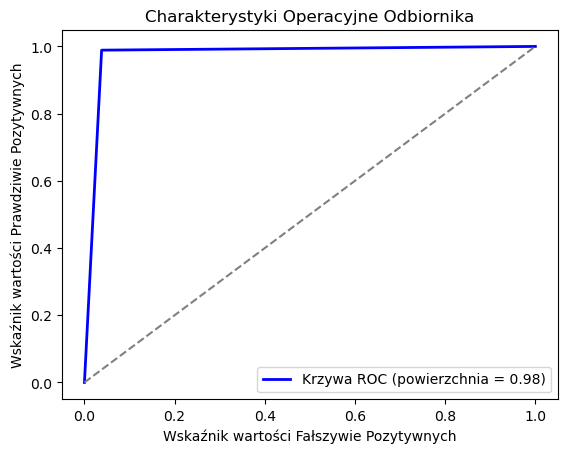

In [591]:
roc(test_model['out'], rfc_out)

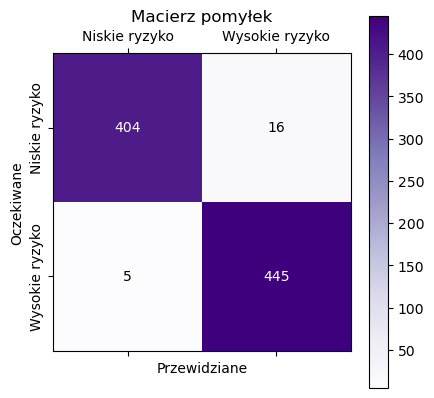

In [592]:
con_mat(test_model['out'], rfc_out, ld)